In [1]:
from keras.datasets import cifar10
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


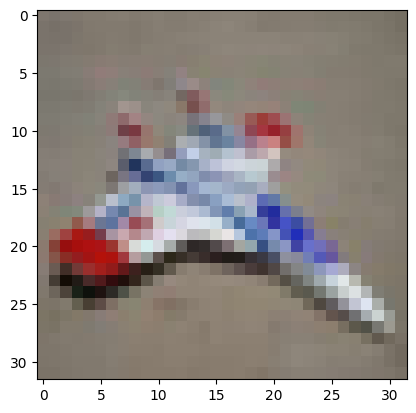

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[30])
plt.show()

In [4]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [5]:
x_train=x_train.reshape(-1,32,32,3)
x_test=x_test.reshape(-1,32,32,3)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 10), (10000, 10))

In [6]:
x_train=x_train/255
x_test=x_test/255

In [7]:
from keras.models import Model
from keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [8]:
inputs=Input(shape=(32,32,3))

c1=Conv2D(64,(3,3),padding="same",activation="relu")(inputs)
m1=MaxPooling2D(padding="same")(c1)

drop1=Dropout(0.3)(m1)

c2=Conv2D(64,(3,3),padding="same",activation="relu")(drop1)
m2=MaxPooling2D(padding="same")(c2)

drop2=Dropout(0.3)(m2)

c3=Conv2D(64,(5,5),padding="same",activation="relu")(drop2)
m3=MaxPooling2D(padding="same")(c3)


drop2=Dropout(0.3)(m3)

conv_out=Flatten()(drop2)

d1=Dense(512,activation="relu")(conv_out)

out=Dense(10,activation="softmax")(d1)
     

In [9]:
model=Model(inputs=inputs,outputs=out)
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [10]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 671,114 (2.56 MB)

 Trainable params: 671,114 (2.56 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.fit(x_train,y_train,batch_size=64,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
197/782 ━━━━━━━━━━━━━━━━━━━━ 49s 84ms/step - accuracy: 0.2023 - loss: 2.1164

In [ ]:
model.save("NNPractical.h5")